## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# importing the dataset
kingcounty_df = pd.read_csv("kc_house_data.csv")
kingcounty_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Data Cleaning

In [2]:
kingcounty_df.shape

(21597, 21)

In [3]:
kingcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with Misssing Data, Duplicates and Placeholders
Currently the following columns in the dataset contain missing data.
* Water front - 2376,
* view - 63
* yr_renovated - 3842

In [4]:
kingcounty_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The rows containing missing columns identified above will be dropped based on the following justifications:

    a) Dropping the rows will not result to the loss of a proportionate percentage of the whole large dataset,
    b) Replacing the categorical variables with any form of measure of central tendency would result to data that might 
    potentially lead to bias in the model. 

In [5]:
# droppin the rows missing data
kingcounty_df.dropna(inplace = True)

### Dealing with duplicates

In [6]:
# checking for duplicates using the id column
duplicates = kingcounty_df[kingcounty_df.duplicated(
subset = "id")]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


In [7]:
# dropping the duplicated data
kingcounty_df.drop_duplicates(subset="id", keep="first", inplace=True)

In [8]:
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


### Placeholders

In [9]:
kingcounty_df.sample(n=12) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14198,4388000120,4/23/2015,289950.0,4,2.25,2190,6906,1.0,NO,NONE,...,7 Average,1040,1150.0,1977,0.0,98023,47.3190,-122.373,1250,6440
4926,9572000080,6/16/2014,300000.0,5,3.00,1940,6355,1.0,NO,NONE,...,8 Good,1200,740.0,2007,0.0,98168,47.4980,-122.322,1940,5033
21323,5393600562,5/22/2014,430000.0,2,2.50,1520,1588,2.0,NO,NONE,...,8 Good,1240,280.0,2007,0.0,98144,47.5825,-122.313,1660,6000
2030,2414600400,8/5/2014,210000.0,2,2.00,1190,7570,1.0,NO,NONE,...,6 Low Average,1190,0.0,1939,0.0,98146,47.5113,-122.338,1190,7635
2604,1926069035,7/22/2014,299000.0,2,1.00,1070,189486,1.0,NO,NONE,...,6 Low Average,1070,0.0,1942,0.0,98077,47.7199,-122.085,1970,60548
14102,1180003175,4/10/2015,229950.0,2,1.00,850,6000,1.0,NO,NONE,...,6 Low Average,850,0.0,1924,0.0,98178,47.4972,-122.224,1100,6000
5204,3528900980,5/23/2014,648475.0,4,2.75,2250,5700,1.0,NO,NONE,...,8 Good,1200,1050.0,1951,0.0,98109,47.6406,-122.344,1720,3850
16492,7614100020,10/17/2014,265000.0,3,2.50,1340,10290,1.0,NO,NONE,...,7 Average,1140,200.0,1981,0.0,98042,47.3553,-122.149,1760,7903
17518,3326059238,5/6/2015,500000.0,4,2.25,2050,7201,2.0,NO,NONE,...,8 Good,2050,0.0,1994,0.0,98033,47.7003,-122.165,1970,7350
14457,7558800620,8/22/2014,600000.0,2,1.75,1550,7764,1.0,YES,EXCELLENT,...,8 Good,1550,0.0,1965,1986.0,98070,47.3580,-122.446,1690,11620


In [10]:
# changing the sqft_basement column from categorical to numerical
kingcounty_df["sqft_basement"] = pd.to_numeric(kingcounty_df["sqft_basement"], errors='coerce')
kingcounty_df["sqft_basement"].dtypes

dtype('float64')

In [11]:
# missing data that was originally in filled by symbols
kingcounty_df["sqft_basement"].isna().sum()

332

The sqft_basement is missing **332** data points

In [12]:
# Drop the missing data in the above column
kingcounty_df.dropna(inplace = True)

In [13]:
kingcounty_df.shape

(15344, 21)

## Data Transformation

### Using ordinal encoding to convert categorical variables into numerical

In [14]:
#Checking for the ordinal data used in the "view" column
kingcounty_df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [15]:
# Using ordinal encoding to convert the ordinal range into numerical variables
# create a mapping dictionary
mapping_dict = {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5,}

# map the ordinal column to the appropriate numerical values
kingcounty_df['view_num'] = kingcounty_df['view'].map(mapping_dict)

In [16]:
#Using ordinal encoding to create numerical representation of the "waterfront" column
# Map 'yes' to 1 and 'no' to 0
kingcounty_df["waterfront_num"] = kingcounty_df["waterfront"].map({'YES': 1, 'NO': 0})                                                

kingcounty_df.head(5)

kingcounty_df.dtypes


id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view               object
condition          object
grade              object
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
view_num            int64
waterfront_num      int64
dtype: object

In [17]:
kingcounty_df['date_column'] = pd.to_datetime(kingcounty_df['date'])
kingcounty_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_num,waterfront_num,date_column
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,2014-12-09
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,2015-02-18
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1,0,2014-05-12
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1960,0.0,98146,47.5123,-122.337,1780,8113,1,0,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,2008,0.0,98116,47.5773,-122.409,1330,1265,1,0,2015-02-19
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,1,0,2014-05-21
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,2015-02-23
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,1,0,2014-06-23


In [18]:
kingcounty_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_num',
       'waterfront_num', 'date_column'],
      dtype='object')

In [19]:
kingcounty_df["bedrooms"].unique()

array([ 3,  4,  2,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [20]:
kingcounty_df['grade']

1           7 Average
3           7 Average
4              8 Good
5        11 Excellent
8           7 Average
             ...     
21591          8 Good
21592          8 Good
21593          8 Good
21594       7 Average
21596       7 Average
Name: grade, Length: 15344, dtype: object

In [21]:
kingcounty_df.drop('date', axis = 1, inplace = True)

In [22]:
kingcounty_df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [23]:
kingcounty_df['price'].max()

7700000.0

# Exploratory Data Analysis

## Distribution of target variable

Checking the distribution of the target variable which is the **price** of houses in King County

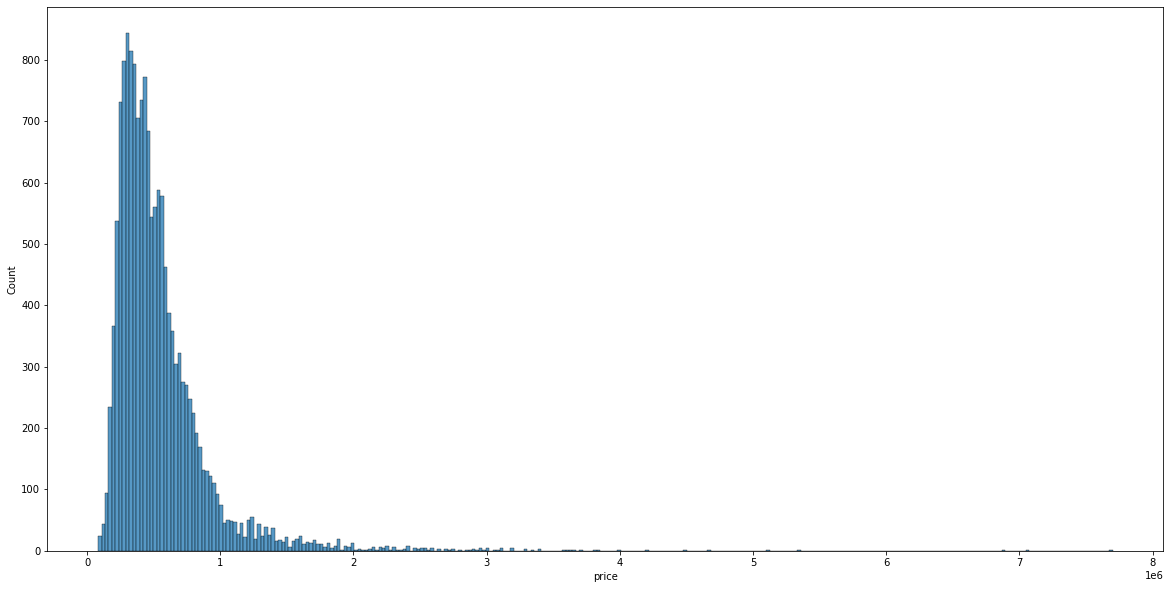

In [24]:
#setting figure size
plt.figure(figsize=(20,10))

#Plotting a histogram to check the distribution of the price
sns.histplot(kingcounty_df['price'])  
plt.show()


The data distribution is skewed to the left. The boxplot below allows us to investigate whether this is caused by outliers

F:\Conda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

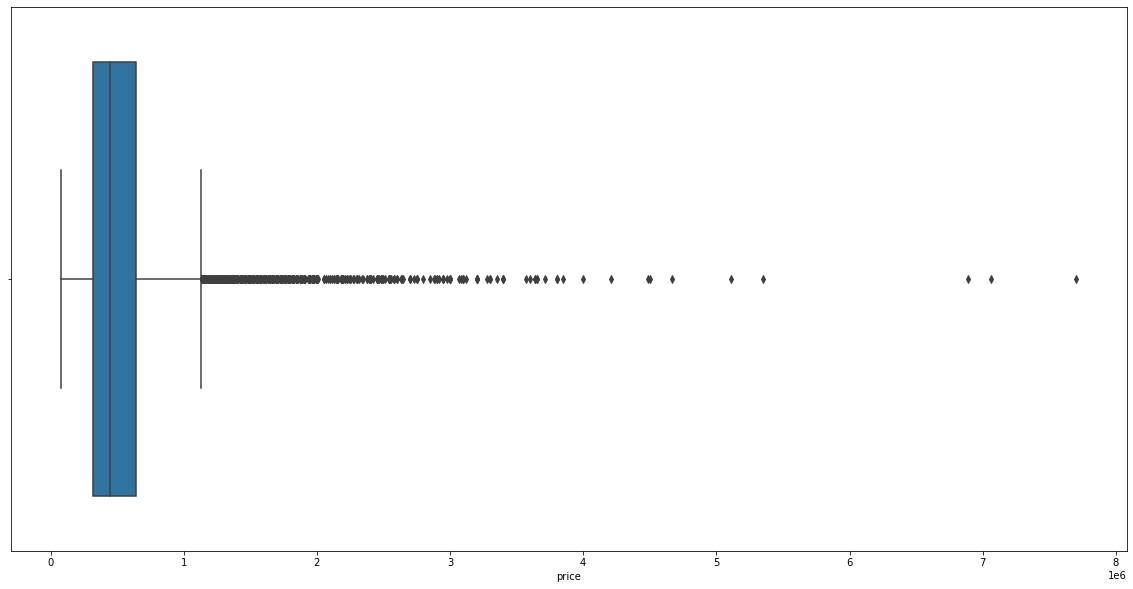

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(kingcounty_df['price'])
plt.show

## Linearity assumption check

In this section of EDA, we will investigate which features are correlated with the target i.e **price**

The linearity check will require that their is a linear relationship between the response variable/target and the predictor variable

In [26]:
import numpy as np

Text(0, 0.5, 'Price')

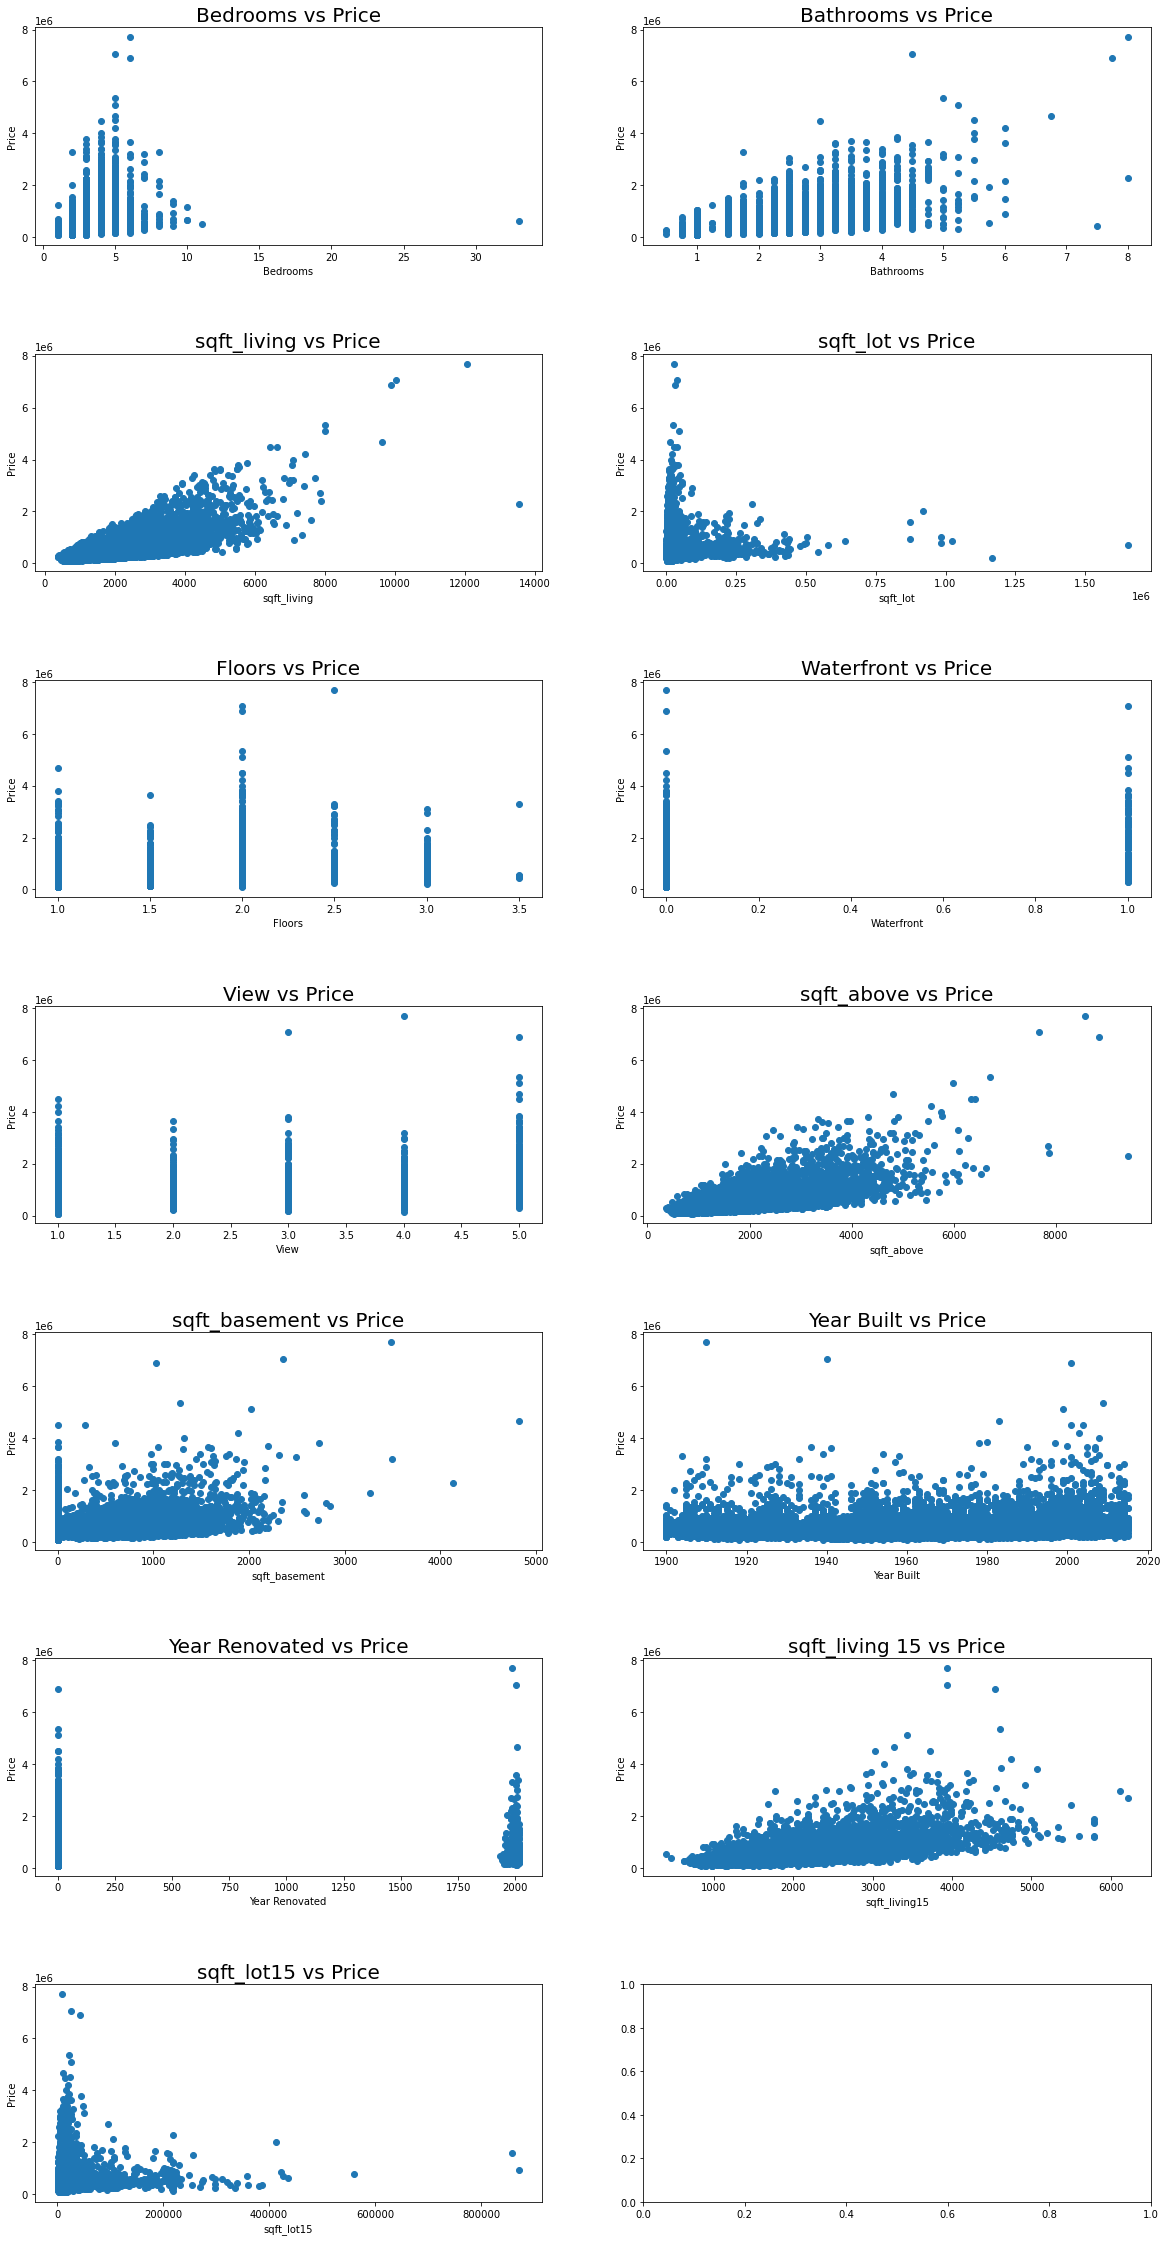

In [27]:
#Plotting the independent variables to the target 

fig, ax = plt.subplots(7,2, figsize=(20,40))
y = kingcounty_df["price"]
plt.subplots_adjust(hspace = 0.5)

#adjusting the font sizes in the scatterplots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


ax[0,0].scatter(kingcounty_df['bedrooms'],y)
ax[0,0].set_title ("Bedrooms vs Price")
ax[0,0].set_xlabel("Bedrooms")
ax[0,0].set_ylabel("Price")

ax[0,1].scatter(kingcounty_df['bathrooms'],y)
ax[0,1].set_title ("Bathrooms vs Price")
ax[0,1].set_xlabel("Bathrooms")
ax[0,1].set_ylabel("Price")

ax[1,0].scatter(kingcounty_df['sqft_living'],y)
ax[1,0].set_title ("sqft_living vs Price")
ax[1,0].set_xlabel("sqft_living")
ax[1,0].set_ylabel("Price")

ax[1,1].scatter(kingcounty_df['sqft_lot'],y)
ax[1,1].set_title ("sqft_lot vs Price")
ax[1,1].set_xlabel("sqft_lot")
ax[1,1].set_ylabel("Price")

ax[2,0].scatter(kingcounty_df['floors'],y)
ax[2,0].set_title ("Floors vs Price")
ax[2,0].set_xlabel("Floors")
ax[2,0].set_ylabel("Price")

ax[2,1].scatter(kingcounty_df['waterfront_num'],y)
ax[2,1].set_title ("Waterfront vs Price")
ax[2,1].set_xlabel("Waterfront")
ax[2,1].set_ylabel("Price")

ax[3,0].scatter(kingcounty_df['view_num'],y)
ax[3,0].set_title ("View vs Price")
ax[3,0].set_xlabel("View")
ax[3,0].set_ylabel("Price")

ax[3,1].scatter(kingcounty_df['sqft_above'],y)
ax[3,1].set_title ("sqft_above vs Price")
ax[3,1].set_xlabel("sqft_above")
ax[3,1].set_ylabel("Price")

ax[4,0].scatter(kingcounty_df['sqft_basement'],y)
ax[4,0].set_title ("sqft_basement vs Price")
ax[4,0].set_xlabel("sqft_basement")
ax[4,0].set_ylabel("Price")

ax[4,1].scatter(kingcounty_df['yr_built'],y)
ax[4,1].set_title ("Year Built vs Price")
ax[4,1].set_xlabel("Year Built")
ax[4,1].set_ylabel("Price")

ax[5,0].scatter(kingcounty_df['yr_renovated'],y)
ax[5,0].set_title ("Year Renovated vs Price")
ax[5,0].set_xlabel("Year Renovated")
ax[5,0].set_ylabel("Price")

ax[5,1].scatter(kingcounty_df['sqft_living15'],y)
ax[5,1].set_title ("sqft_living 15 vs Price")
ax[5,1].set_xlabel("sqft_living15")
ax[5,1].set_ylabel("Price")

ax[6,0].scatter(kingcounty_df['sqft_lot15'],y)
ax[6,0].set_title ("sqft_lot15 vs Price")
ax[6,0].set_xlabel("sqft_lot15")
ax[6,0].set_ylabel("Price")

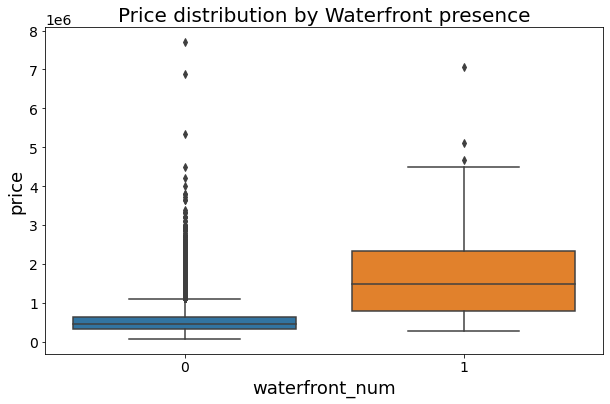

In [28]:
# Assuming 'waterfront' is a binary variable indicating presence (Yes) or absence (No) of a waterfront
# If it's not, you'll have to preprocess your data to convert 'waterfront' into a categorical variable

plt.figure(figsize=(10,6))

sns.boxplot(x='waterfront_num', y='price', data=kingcounty_df)

plt.title('Price distribution by Waterfront presence')
plt.show()

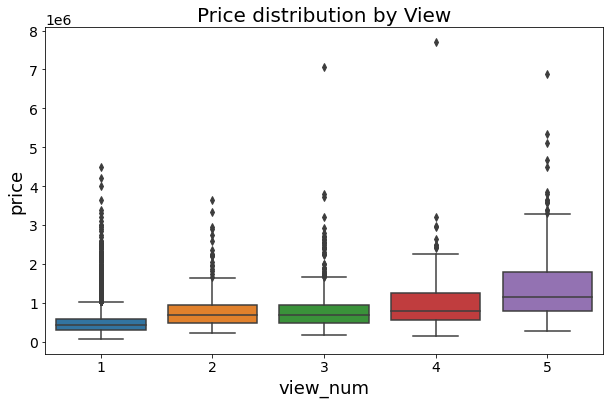

In [29]:
plt.figure(figsize=(10,6))

sns.boxplot(x='view_num', y='price', data=kingcounty_df)

plt.title('Price distribution by View')
plt.show()

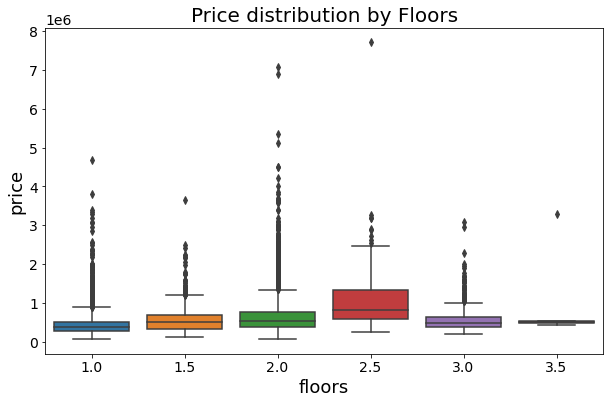

In [30]:
plt.figure(figsize=(10,6))

sns.boxplot(x='floors', y='price', data=kingcounty_df)

plt.title('Price distribution by Floors')
plt.show()

## Multicollinearity check

This section of the EDA focuses on investigating whether there is any perfect linear relationships amongst the variables. A correlation matrix will be used for the multicollinearity check

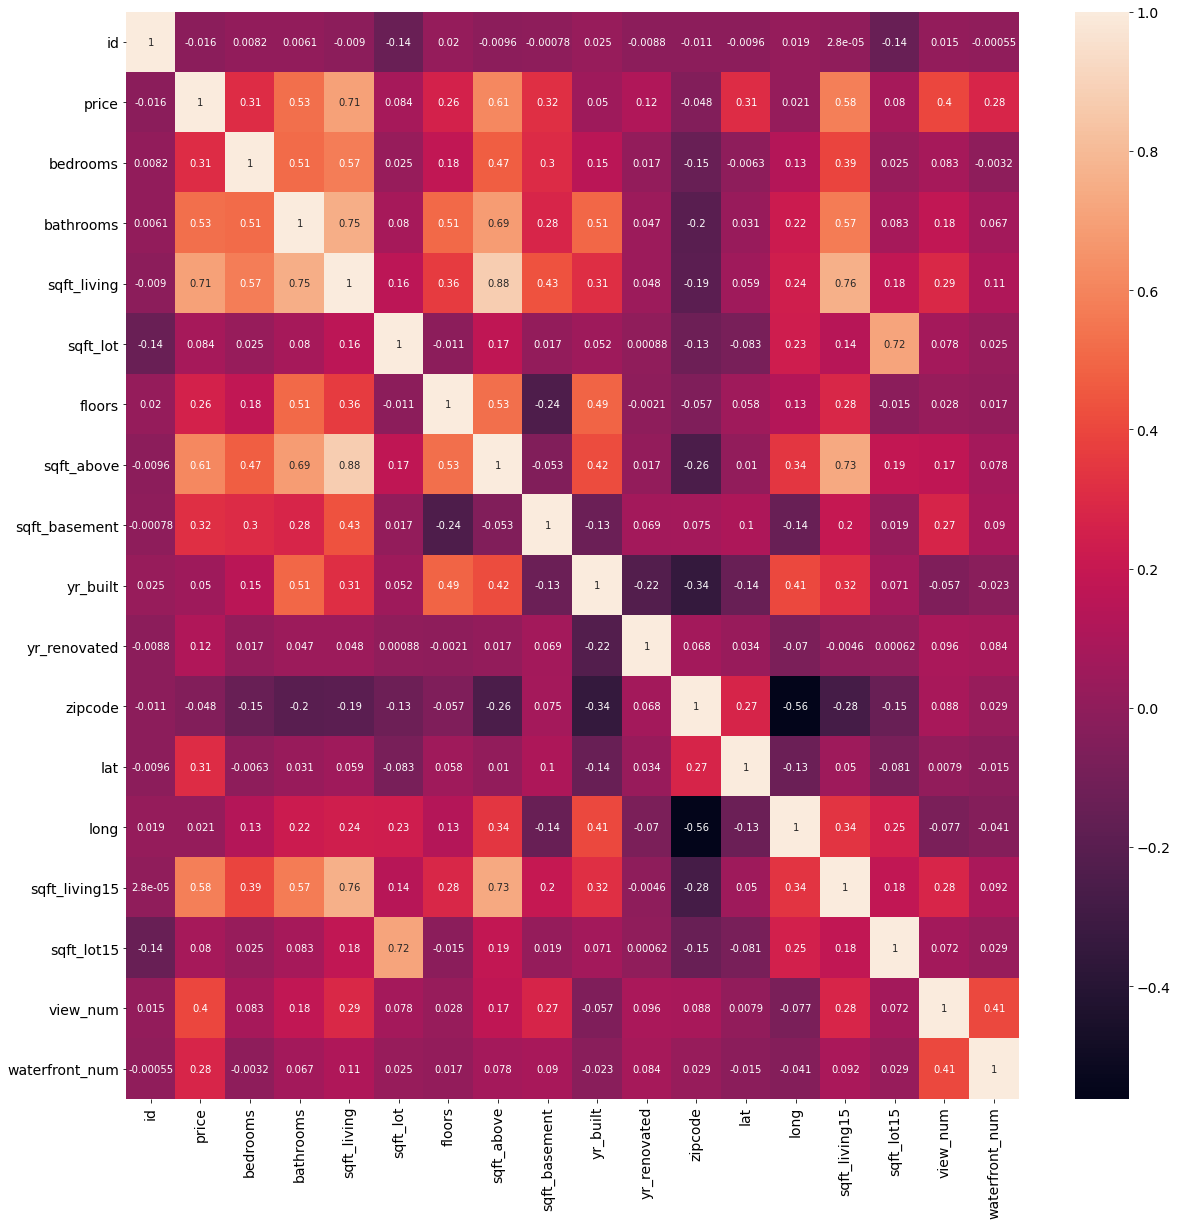

In [31]:
correlation_matrix = kingcounty_df.corr()

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Based on the results of the correlation matrix, there are no variables which show a high level of linear relationship that would affect the accuracy of the model.

In [36]:
kingcounty_df['grade']

1           7 Average
3           7 Average
4              8 Good
5        11 Excellent
8           7 Average
             ...     
21591          8 Good
21592          8 Good
21593          8 Good
21594       7 Average
21596       7 Average
Name: grade, Length: 15344, dtype: object

In [40]:
kingcounty_df.dtypes

id                         int64
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                object
view                      object
condition                 object
grade                     object
sqft_above                 int64
sqft_basement            float64
yr_built                   int64
yr_renovated             float64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
view_num                   int64
waterfront_num             int64
date_column       datetime64[ns]
dtype: object